## Problem:

### For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

#### Data set for the Problem: Sparkling.csv and Rose.csv
#### Please do perform the following questions on each of these two data sets separately.


In [1]:
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams
import warnings
warnings.filterwarnings("ignore")

##### 1.Read the data as an appropriate Time Series data and plot the data.
##### 2.Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.
##### 3.Split the data into training and test. The test data should start in 1991.
##### 4.Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data.Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.
##### 5.Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. (Note: Stationarity should be checked at alpha = 0.05.)
##### 6.Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.
##### 7.Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.
##### 8.Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.
##### 9.Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.
##### 10.Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

## 1.Readind the data for Rose

In [2]:
df = pd.read_csv("Rose.csv")
df.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [3]:
print(df.head())
print('\n')
print(df.tail())

  YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0


    YearMonth  Rose
182   1995-03  45.0
183   1995-04  52.0
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0


In [4]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [5]:
df['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df.head()

,YearMonth,Rose,Time_Stamp
0,1980-01,112.0,1980-01-31
1,1980-02,118.0,1980-02-29
2,1980-03,129.0,1980-03-31
3,1980-04,99.0,1980-04-30
4,1980-05,116.0,1980-05-31


In [6]:
df['Time_Stamp'] = pd.to_datetime(df['Time_Stamp'])
df = df.set_index('Time_Stamp')
df.drop(['YearMonth'], axis=1, inplace=True)
df.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


## 2.EDA

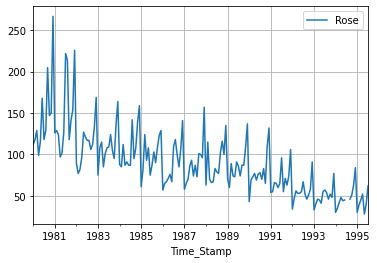

In [7]:
df.plot();
plt.grid()

In [8]:
df.describe()

,Rose
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


In [9]:
df.isnull().sum()

Rose    2
dtype: int64

#### Yearly Boxplot

In [10]:
import seaborn as sns

In [11]:
df_1 = pd.read_csv("Rose.csv",parse_dates=True,squeeze=True,index_col=0)

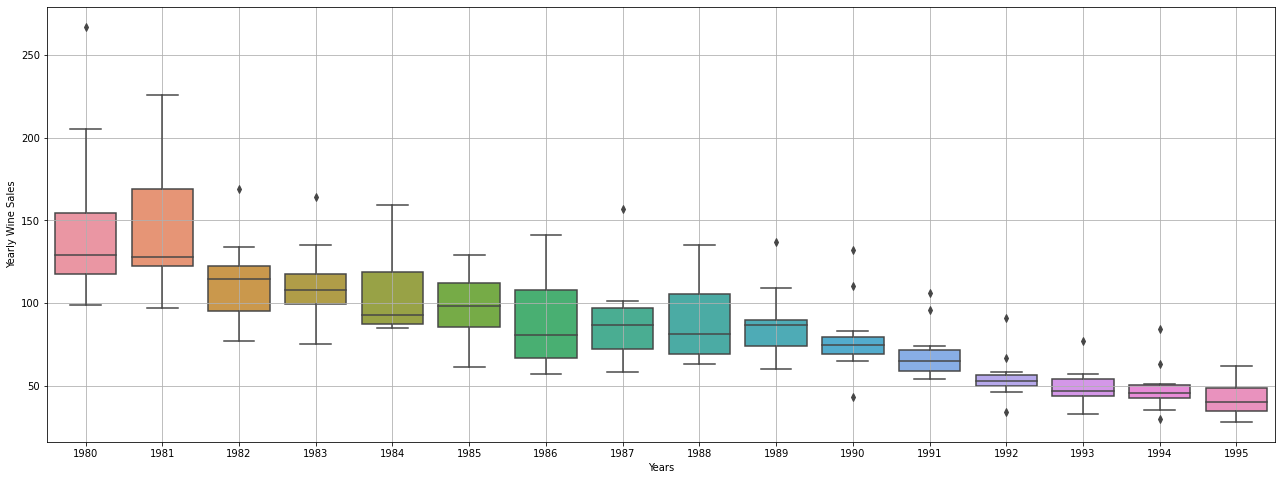

In [12]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df_1.index.year, df_1, ax=ax,whis=1.5)
plt.grid(); 
plt.xlabel('Years');
plt.ylabel('Yearly Wine Sales');

#### Monthly Plot

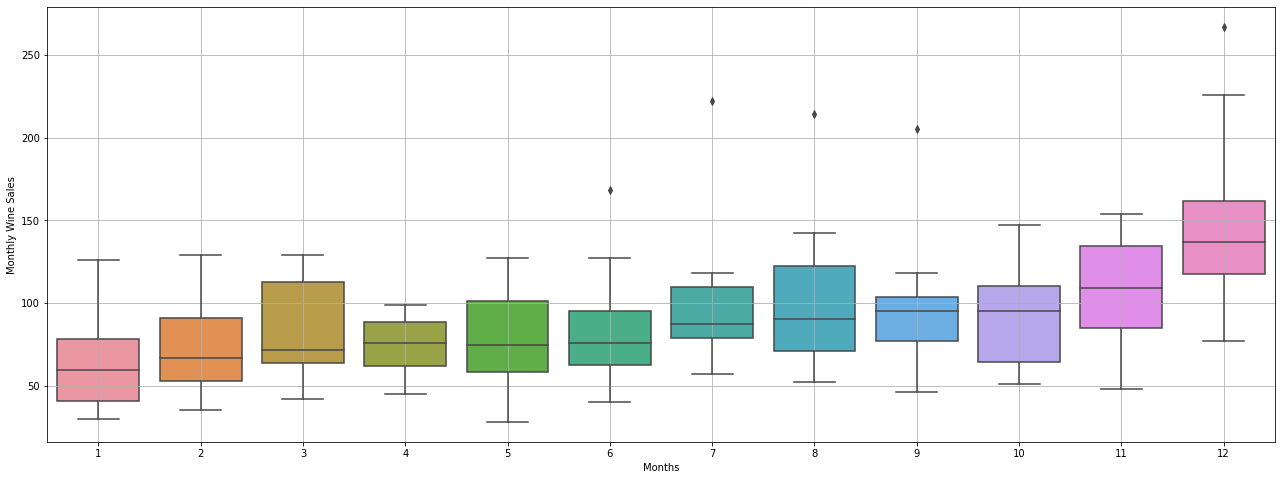

In [13]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df_1.index.month, df_1, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Months');
plt.ylabel('Monthly Wine Sales');

#### MonthPlot for TimeSeries

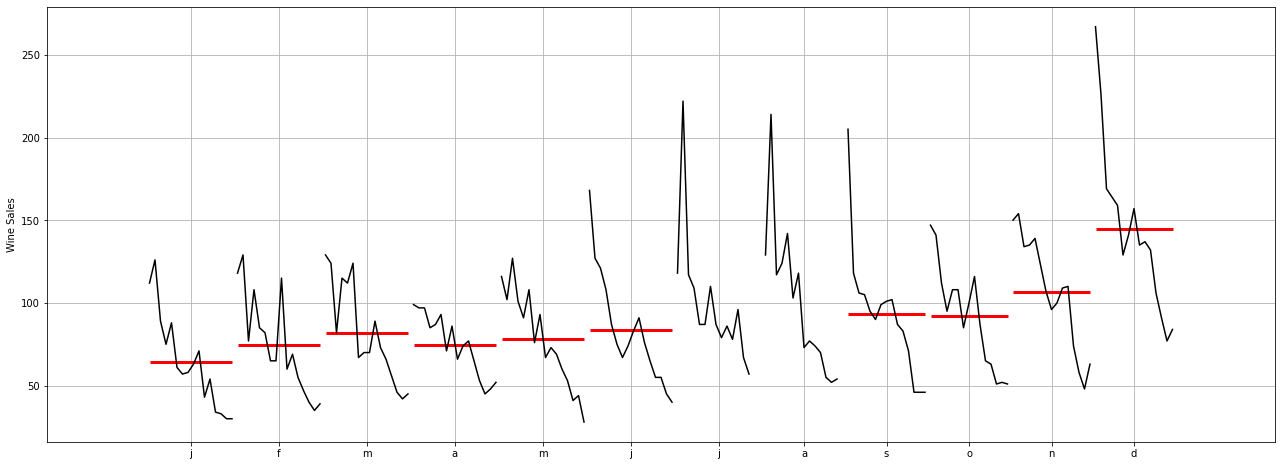

In [14]:
from statsmodels.graphics.tsaplots import month_plot
fig, ax = plt.subplots(figsize=(22,8))
month_plot(df, ylabel='Wine Sales', ax=ax)  #input is df
plt.grid();

In [15]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Rose', columns = df_1.index.month_name(), index = df.index.year)
monthly_sales_across_years

YearMonth,April,August,December,February,January,July,June,March,May,November,October,September
Time_Stamp,,,,,,,,,,,,
1980,99.0,129.0,267.0,118.0,112.0,118.0,168.0,129.0,116.0,150.0,147.0,205.0
1981,97.0,214.0,226.0,129.0,126.0,222.0,127.0,124.0,102.0,154.0,141.0,118.0
1982,97.0,117.0,169.0,77.0,89.0,117.0,121.0,82.0,127.0,134.0,112.0,106.0
1983,85.0,124.0,164.0,108.0,75.0,109.0,108.0,115.0,101.0,135.0,95.0,105.0
1984,87.0,142.0,159.0,85.0,88.0,87.0,87.0,112.0,91.0,139.0,108.0,95.0
1985,93.0,103.0,129.0,82.0,61.0,87.0,75.0,124.0,108.0,123.0,108.0,90.0
1986,71.0,118.0,141.0,65.0,57.0,110.0,67.0,67.0,76.0,107.0,85.0,99.0
1987,86.0,73.0,157.0,65.0,58.0,87.0,74.0,70.0,93.0,96.0,100.0,101.0
1988,66.0,77.0,135.0,115.0,63.0,79.0,83.0,70.0,67.0,100.0,116.0,102.0


#### Monthly Sales Across Years

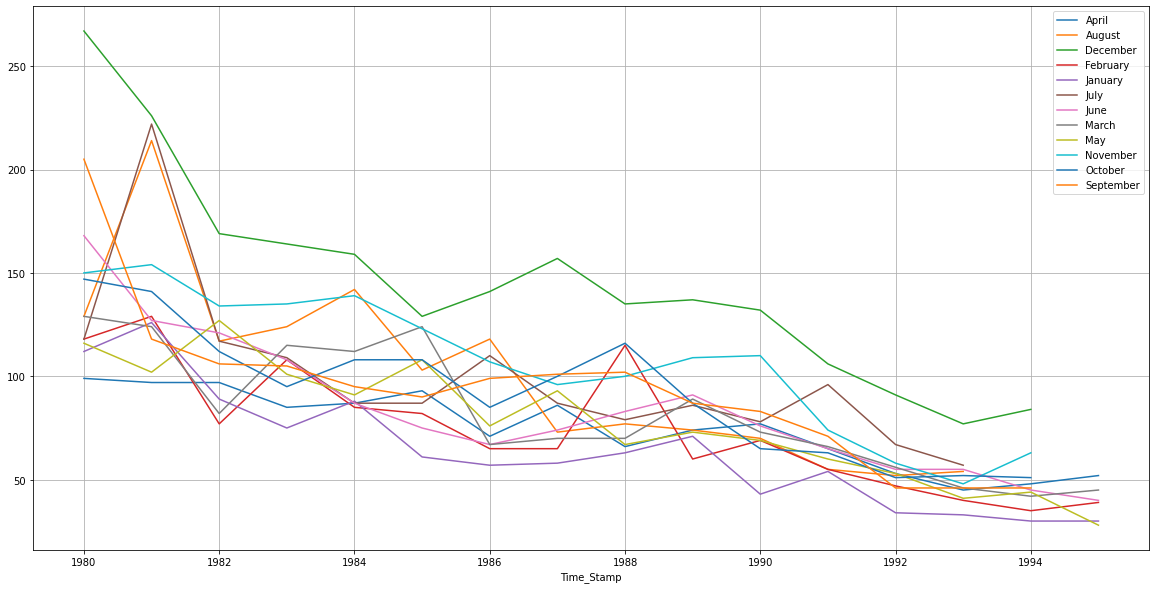

In [16]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

#### Empirical Cumulative Distribution

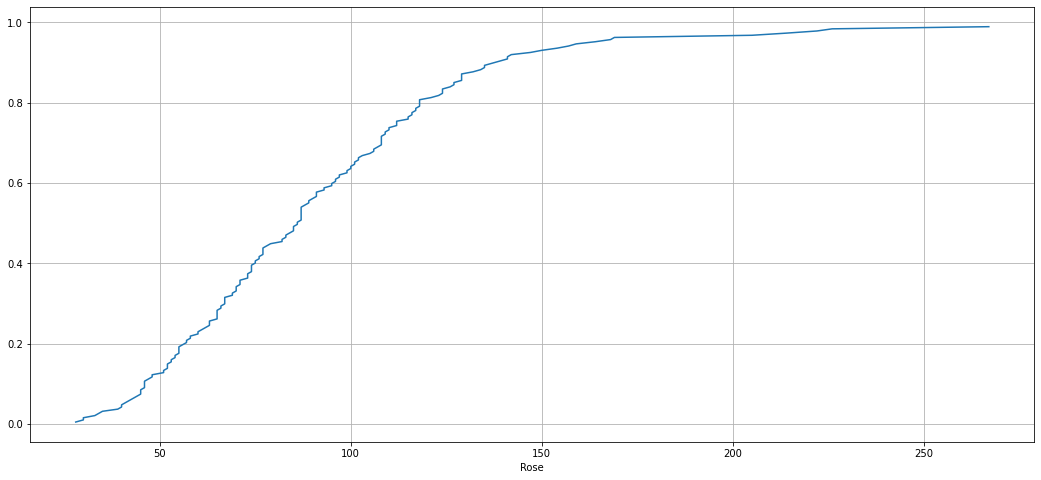

In [17]:
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Rose');

#### Yearly Plot

In [18]:
df_yearly_sum = df.resample('A').sum()
df_yearly_sum.head()

,Rose
Time_Stamp,
1980-12-31,1758.0
1981-12-31,1780.0
1982-12-31,1348.0
1983-12-31,1324.0
1984-12-31,1280.0


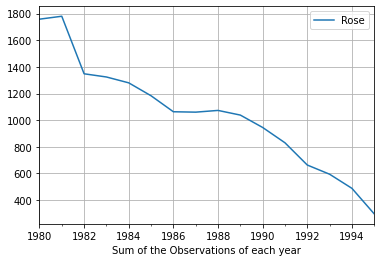

In [19]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

In [20]:
df_yearly_mean = df.resample('Y').mean()
df_yearly_mean.head()

,Rose
Time_Stamp,
1980-12-31,146.500000
1981-12-31,148.333333
1982-12-31,112.333333
1983-12-31,110.333333
1984-12-31,106.666667


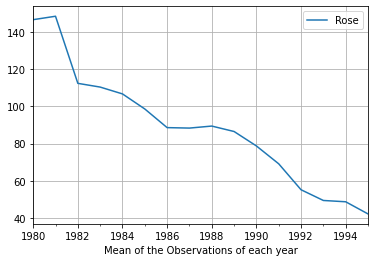

In [21]:
df_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

#### Quarterly Plot

In [22]:
df_quarterly_sum = df.resample('Q').sum()
df_quarterly_sum.head()

,Rose
Time_Stamp,
1980-03-31,359.0
1980-06-30,383.0
1980-09-30,452.0
1980-12-31,564.0
1981-03-31,379.0


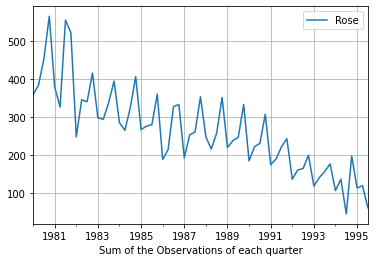

In [23]:
df_quarterly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each quarter');

In [24]:
df_quarterly_mean = df.resample('Q').mean()
df_quarterly_mean.head()

,Rose
Time_Stamp,
1980-03-31,119.666667
1980-06-30,127.666667
1980-09-30,150.666667
1980-12-31,188.000000
1981-03-31,126.333333


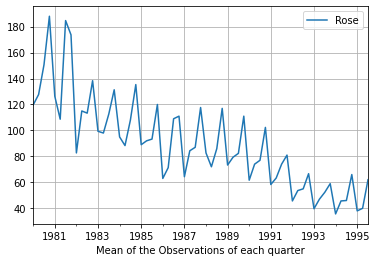

In [25]:
df_quarterly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each quarter');

#### Decade Plot

In [26]:
df_decade_sum = df.resample('10Y').sum()
df_decade_sum

,Rose
Time_Stamp,
1980-12-31,1758.0
1990-12-31,12094.0
2000-12-31,2871.0


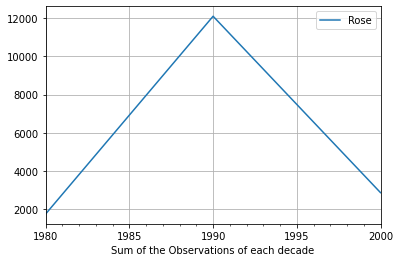

In [27]:
df_decade_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each decade');

In [28]:
df.isnull().sum()

Rose    2
dtype: int64

In [29]:
df.interpolate(method= 'spline',order=3,inplace=True)

In [30]:
df['1994']

,Rose
Time_Stamp,
1994-01-31,30.000000
1994-02-28,35.000000
1994-03-31,42.000000
1994-04-30,48.000000
1994-05-31,44.000000
1994-06-30,45.000000
1994-07-31,43.693064
1994-08-31,44.326877
1994-09-30,46.000000


In [31]:
df.isna().sum()

Rose    0
dtype: int64

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

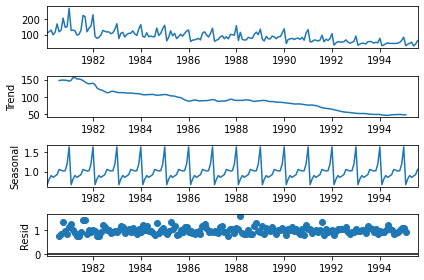

In [33]:
decomposition = seasonal_decompose(df ,model='multiplicative')
decomposition.plot();

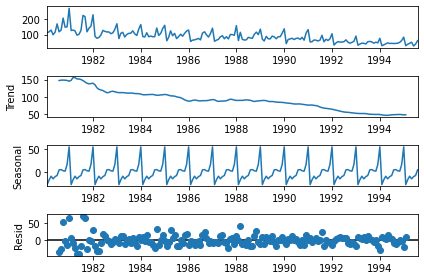

In [34]:
decomposition1 = seasonal_decompose(df ,model='additive')
decomposition1.plot();

In [35]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.670320
1980-02-29    0.806375
1980-03-31    0.901501
1980-04-30    0.854411
1980-05-31    0.889760
1980-06-30    0.924324
1980-07-31    1.056071
1980-08-31    1.034338
1980-09-30    1.017959
1980-10-31    1.022915
1980-11-30    1.192781
1980-12-31    1.629244
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.759671
1980-08-31    0.841974
1980-09-30    1.357259
1980-10-31    0.970446
1980-11-30    0.853069
1980-12-31    1.129231
Name: resid, dtype:

In [36]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(12)

Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.843004
1980-08-31    148.966974
1980-09-30    149.732259
1980-10-31    149.053780
1980-11-30    148.269735
1980-12-31    146.254231
dtype: float64

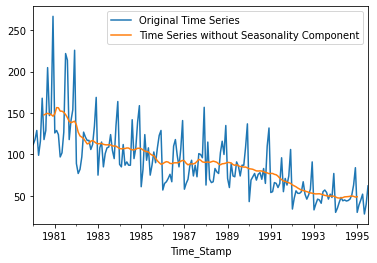

In [37]:
df.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

## 3.Split Train and Test

In [38]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [39]:
print(train.shape)
print (test.shape)

(132, 1)
(55, 1)


In [40]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
              Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0 

Last few rows of Training Data 
              Rose
Time_Stamp       
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0 

First few rows of Test Data 
             Rose
Time_Stamp      
1991-01-31  54.0
1991-02-28  55.0
1991-03-31  66.0
1991-04-30  65.0
1991-05-31  60.0 

Last few rows of Test Data 
             Rose
Time_Stamp      
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0 



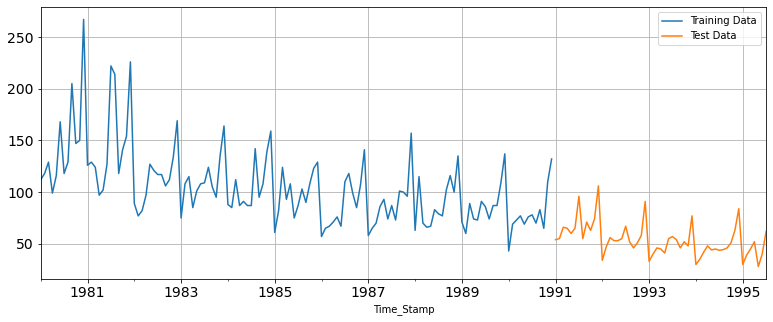

In [41]:
train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

### 4. Different models

### Model 1: Linear Regression

In [42]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [43]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
Time_Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
Time_Stamp             
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
Time_Stamp            
1991-01-31  54.0   133
1991-02-28  55.0   134
1991-03-31  66.0   135
1991-04-30  65.0   136
1991-05-31  60.0   137 

Last few rows of Test Data 
             Rose  time
Time_Stamp            
1995-03-31  45.0   183
1995-04-30  52.0   184
1995-05-31  28.0   185
1995-06-30  40.0   186
1995-07-31  62.0   187 



In [44]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

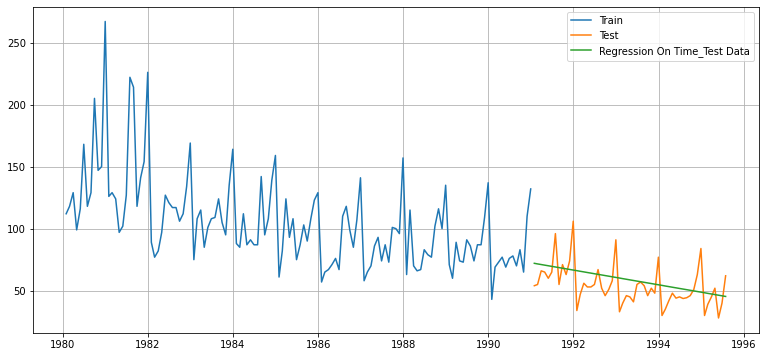

In [45]:
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot  ( train['Rose'],                     label='Train')
plt.plot  ( test['Rose'],                      label='Test')
plt.plot  (LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [46]:
from sklearn import metrics

rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.291


In [47]:
resultsDf = pd.DataFrame({'RMSE': [rmse_model1_test]},index=['LinearRegression'])
resultsDf

,RMSE
LinearRegression,15.29146


### Model 2: Naive Approach

In [48]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

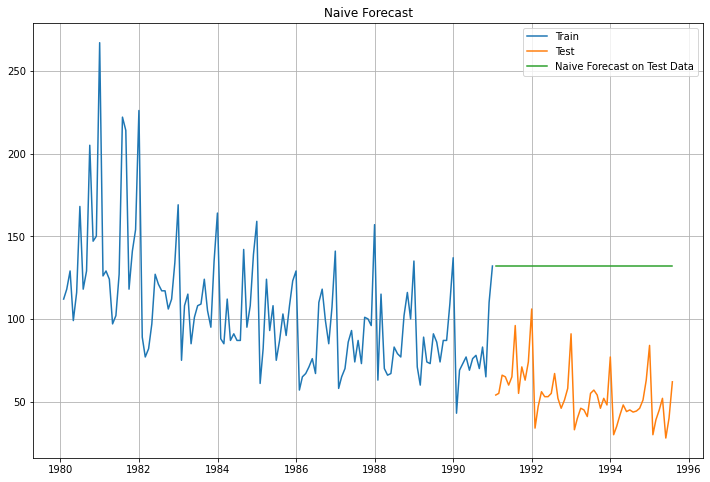

In [49]:
plt.figure(figsize=(12,8))
plt.plot( NaiveModel_train['Rose'],      label='Train')
plt.plot(test['Rose'],                  label='Test')
plt.plot(NaiveModel_test['naive'],      label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [50]:
rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 79.778


In [51]:
resultsDf_2 = pd.DataFrame({'RMSE': [rmse_model2_test]},index=['NaiveModel'])
resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,RMSE
LinearRegression,15.291460
NaiveModel,79.778066


### Method 3: Simple Average

In [52]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
Time_Stamp,,
1991-01-31,54.0,104.939394
1991-02-28,55.0,104.939394
1991-03-31,66.0,104.939394
1991-04-30,65.0,104.939394
1991-05-31,60.0,104.939394


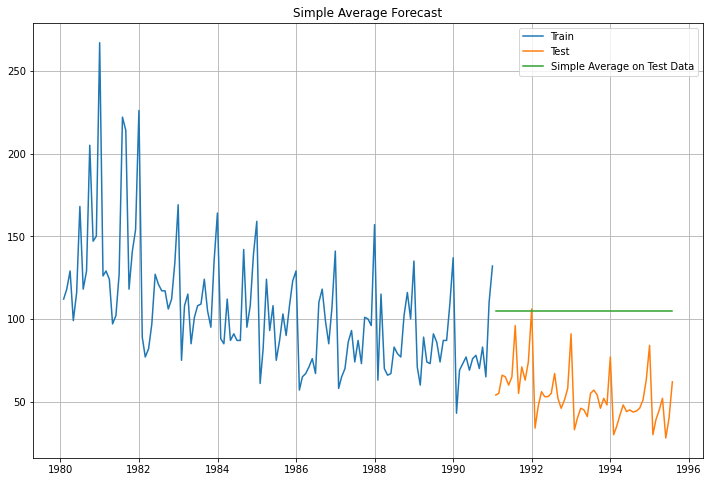

In [53]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [54]:
rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.522


In [55]:
resultsDf_3 = pd.DataFrame({'RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])
resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,RMSE
LinearRegression,15.291460
NaiveModel,79.778066
SimpleAverageModel,53.521557


### Method 4: Moving Average

In [56]:
MovingAverage = df.copy()
MovingAverage.head()

MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_5'] = MovingAverage['Rose'].rolling(5).mean()
MovingAverage['Trailing_8'] = MovingAverage['Rose'].rolling(8).mean()

MovingAverage.head(10)

,Rose,Trailing_2,Trailing_5,Trailing_8
Time_Stamp,,,,
1980-01-31,112.0,NaN,NaN,NaN
1980-02-29,118.0,115.0,NaN,NaN
1980-03-31,129.0,123.5,NaN,NaN
1980-04-30,99.0,114.0,NaN,NaN
1980-05-31,116.0,107.5,114.8,NaN
1980-06-30,168.0,142.0,126.0,NaN
1980-07-31,118.0,143.0,126.0,NaN
1980-08-31,129.0,123.5,126.0,123.625
1980-09-30,205.0,167.0,147.2,135.250


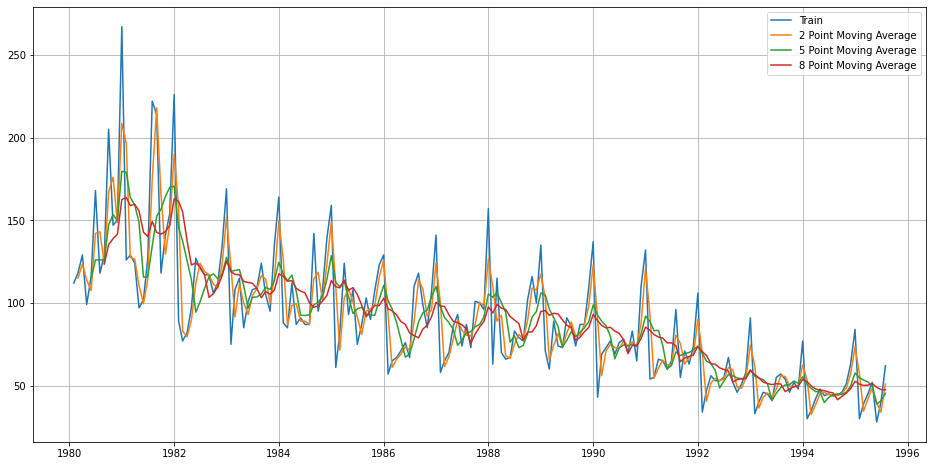

In [57]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_5'], label='5 Point Moving Average')
plt.plot(MovingAverage['Trailing_8'],label = '8 Point Moving Average')
plt.legend(loc = 'best')
plt.grid();

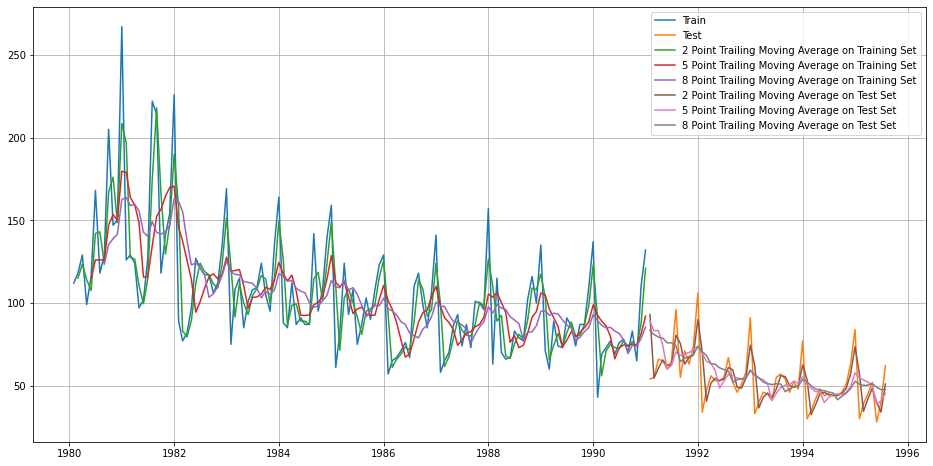

In [58]:
#Creating train and test set 
trailing_MovingAverage_train =  MovingAverage[MovingAverage.index.year < 1991] 
trailing_MovingAverage_test  =  MovingAverage[MovingAverage.index.year >= 1991]

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'],  label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_5'], label='5 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_8'],label = '8 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_5'], label='5 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_8'],label = '8 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [59]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 5 point Trailing MA

rmse_model4_test_5 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_5'],squared=False)
print("For 5 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_5))

## Test Data - RMSE --> 8 point Trailing MA

rmse_model4_test_8 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_8'],squared=False)
print("For 8 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_8))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.530
For 5 point Moving Average Model forecast on the Training Data,  RMSE is 14.491
For 8 point Moving Average Model forecast on the Training Data,  RMSE is 14.812


In [60]:
resultsDf_4 = pd.DataFrame({'RMSE': [rmse_model4_test_2,rmse_model4_test_5
                                          ,rmse_model4_test_8]}
                           ,index=['2pointTrailingMovingAverage','5pointTrailingMovingAverage'
                                   ,'8pointTrailingMovingAverage'])
resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,RMSE
LinearRegression,15.291460
NaiveModel,79.778066
SimpleAverageModel,53.521557
2pointTrailingMovingAverage,11.530180
5pointTrailingMovingAverage,14.491131
8pointTrailingMovingAverage,14.811615


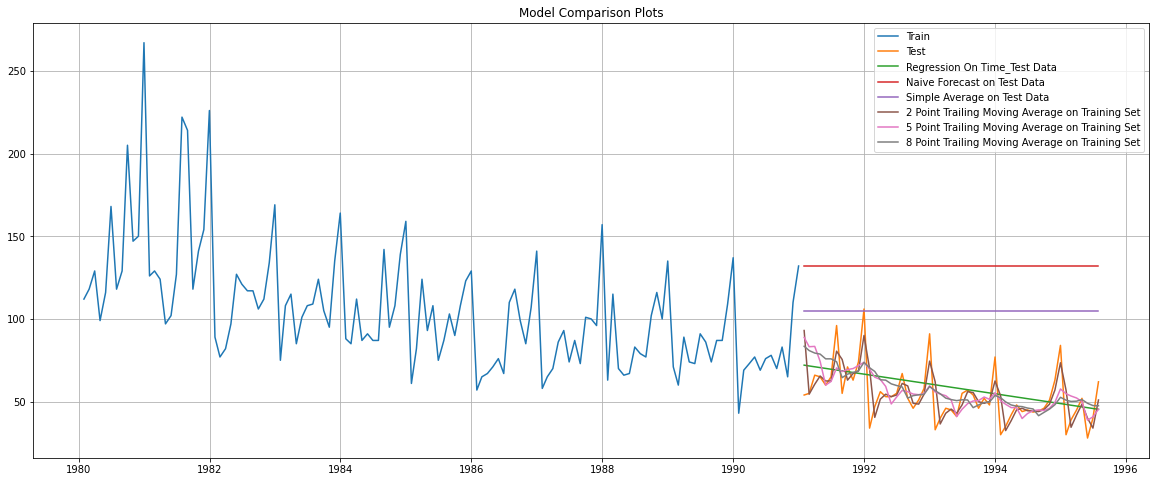

In [61]:
## Plotting on both Training and Test data

plt.figure(figsize=(20,8))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_5'], label='5 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_8'], label='8 Point Trailing Moving Average on Training Set')
plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

### Method 5: Simple Exponential Smoothing

In [62]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

SES_train = train.copy()
SES_test = test.copy()

model_SES = SimpleExpSmoothing(SES_train['Rose'])
model_SES_autofit = model_SES.fit(optimized=True)
model_SES_autofit.params

{'smoothing_level': 0.0987493111726833,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38720226208358,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [63]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Rose,predict
Time_Stamp,,
1991-01-31,54.0,87.104983
1991-02-28,55.0,87.104983
1991-03-31,66.0,87.104983
1991-04-30,65.0,87.104983
1991-05-31,60.0,87.104983


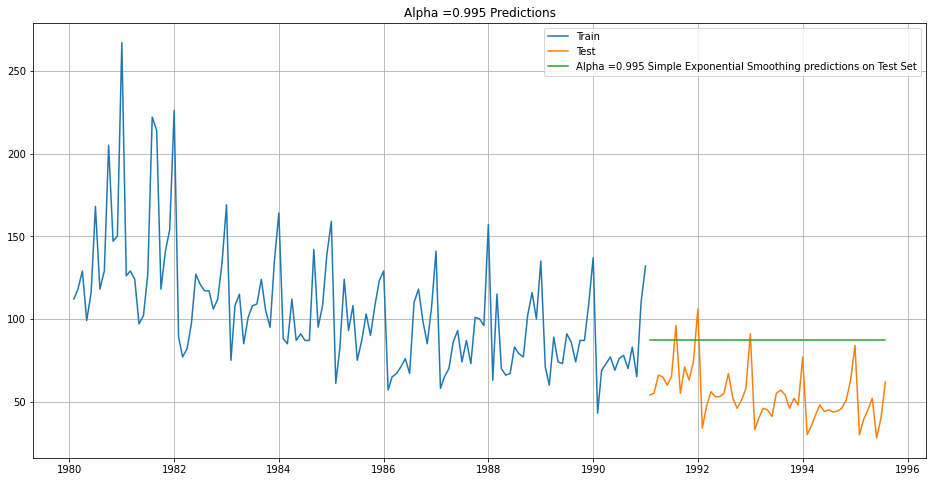

In [64]:
plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')
plt.plot(SES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

In [65]:
rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.859


In [66]:
resultsDf_5 = pd.DataFrame({'RMSE': [rmse_model5_test_1]},index=['SimpleExponentialSmoothing @Alpha=0.995'])
resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,RMSE
LinearRegression,15.291460
NaiveModel,79.778066
SimpleAverageModel,53.521557
2pointTrailingMovingAverage,11.530180
5pointTrailingMovingAverage,14.491131
8pointTrailingMovingAverage,14.811615
SimpleExponentialSmoothing @Alpha=0.995,36.858571


In [67]:
resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})

for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=70)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)
    
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)    

,Alpha Values,Train RMSE,Test RMSE
0,0.1,31.815610,36.890375
1,0.2,31.979391,41.423877
2,0.3,32.470164,47.566302
3,0.4,33.035130,53.828369
4,0.5,33.682839,59.702301
5,0.6,34.441171,65.031433
6,0.7,35.323261,69.758009
7,0.8,36.334596,73.833601
8,0.9,37.482782,77.198702


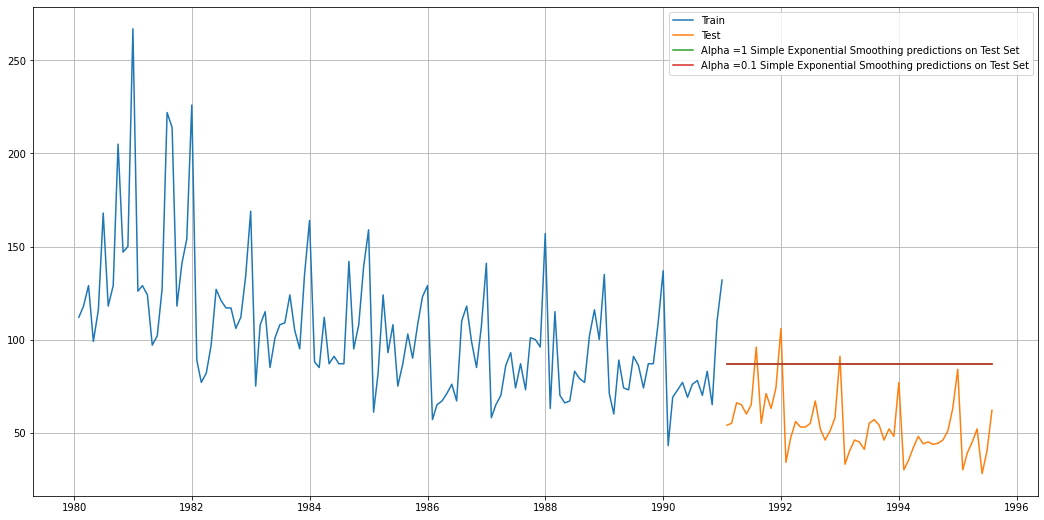

In [68]:
plt.figure(figsize=(18,9))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')
plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [69]:
resultsDf_6_1 = pd.DataFrame({'RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['SimpleExponentialSmoothing @Alpha=0.1'])
resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,RMSE
LinearRegression,15.291460
NaiveModel,79.778066
SimpleAverageModel,53.521557
2pointTrailingMovingAverage,11.530180
5pointTrailingMovingAverage,14.491131
8pointTrailingMovingAverage,14.811615
SimpleExponentialSmoothing @Alpha=0.995,36.858571
SimpleExponentialSmoothing @Alpha=0.1,36.890375


### Method 6: Double Exponential Smoothing (Holt's Model)

In [70]:
DES_train = train.copy()
DES_test = test.copy()

model_DES = Holt(DES_train['Rose'])
resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})

In [71]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=70)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train,'Test RMSE':rmse_model6_test
                                          }, ignore_index=True)      
    

In [72]:
 resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.1,34.439111,36.987695
1,0.1,0.2,33.450729,48.757725
10,0.2,0.1,33.097427,65.800617
2,0.1,0.3,33.145789,78.228265
20,0.3,0.1,33.611269,98.723180


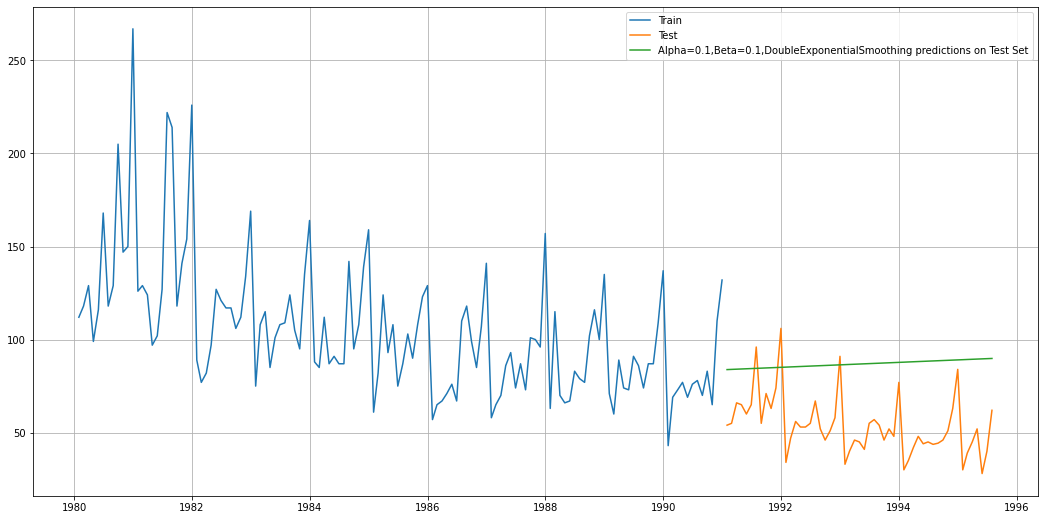

In [73]:
plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')
plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [74]:
resultsDf_7_1 = pd.DataFrame({'RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['DoubleExponentialSmoothing @Alpha=0.1,Beta=0.1'])
resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,RMSE
LinearRegression,15.291460
NaiveModel,79.778066
SimpleAverageModel,53.521557
2pointTrailingMovingAverage,11.530180
5pointTrailingMovingAverage,14.491131
8pointTrailingMovingAverage,14.811615
SimpleExponentialSmoothing @Alpha=0.995,36.858571
SimpleExponentialSmoothing @Alpha=0.1,36.890375
"DoubleExponentialSmoothing @Alpha=0.1,Beta=0.1",36.987695


### Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

In [75]:
TES_train = train.copy()
TES_test = test.copy()

model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative',freq='M')
model_TES_autofit = model_TES.fit()
model_TES_autofit.params

{'smoothing_level': 0.06280372101991354,
 'smoothing_trend': 0.05568813542468586,
 'smoothing_seasonal': 3.115268099923303e-06,
 'damping_trend': nan,
 'initial_level': 59.29348777160217,
 'initial_trend': -0.3727281817131398,
 'initial_seasons': array([1.90362937, 2.16072498, 2.36051494, 2.06290154, 2.31908662,
        2.52928387, 2.77978951, 2.95507465, 2.80602228, 2.74429704,
        3.19876277, 4.41211721]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [76]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Rose,auto_predict
Time_Stamp,,
1991-01-31,54.0,56.879265
1991-02-28,55.0,64.371067
1991-03-31,66.0,70.115332
1991-04-30,65.0,61.093709
1991-05-31,60.0,68.476551


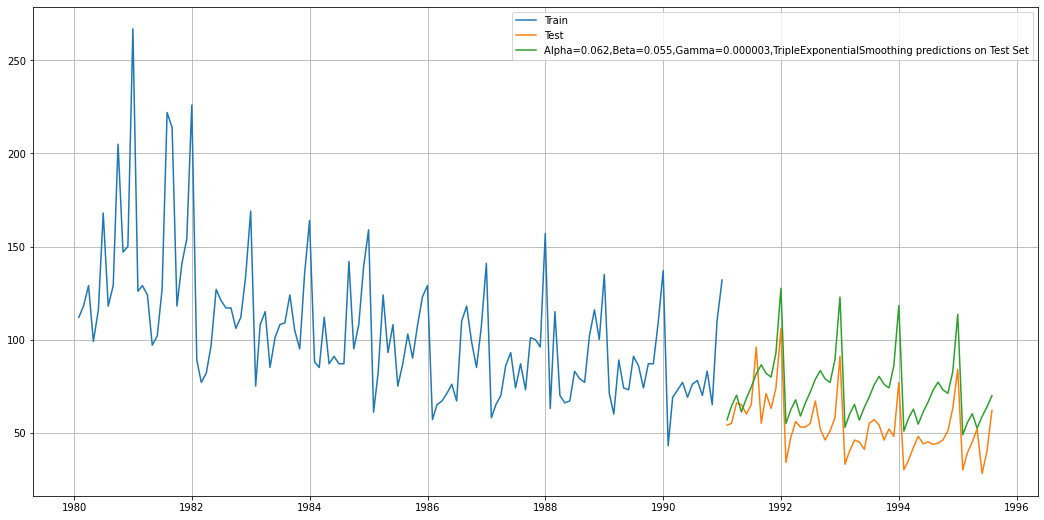

In [77]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')
plt.plot(TES_test['auto_predict'], label='Alpha=0.062,Beta=0.055,Gamma=0.000003,TripleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [78]:
rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.062,Beta=0.055,Gamma=0.000003, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.062,Beta=0.055,Gamma=0.000003, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 21.459


In [79]:
resultsDf_8_1 = pd.DataFrame({'RMSE': [rmse_model6_test_1]}
                           ,index=['TripleExponentialSmoothing @Alpha=0.062,Beta=0.055,Gamma=3.115'])
resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,RMSE
LinearRegression,15.291460
NaiveModel,79.778066
SimpleAverageModel,53.521557
2pointTrailingMovingAverage,11.530180
5pointTrailingMovingAverage,14.491131
8pointTrailingMovingAverage,14.811615
SimpleExponentialSmoothing @Alpha=0.995,36.858571
SimpleExponentialSmoothing @Alpha=0.1,36.890375
"DoubleExponentialSmoothing @Alpha=0.1,Beta=0.1",36.987695
"TripleExponentialSmoothing @Alpha=0.062,Beta=0.055,Gamma=3.115",21.458971


In [80]:
resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})

for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=70)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [81]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
11,0.1,0.2,0.2,24.365597,9.665739
10,0.1,0.2,0.1,25.529854,9.954136
12,0.1,0.2,0.3,23.969166,9.961876
142,0.2,0.5,0.3,27.631767,10.002930
151,0.2,0.6,0.2,28.289836,10.005753


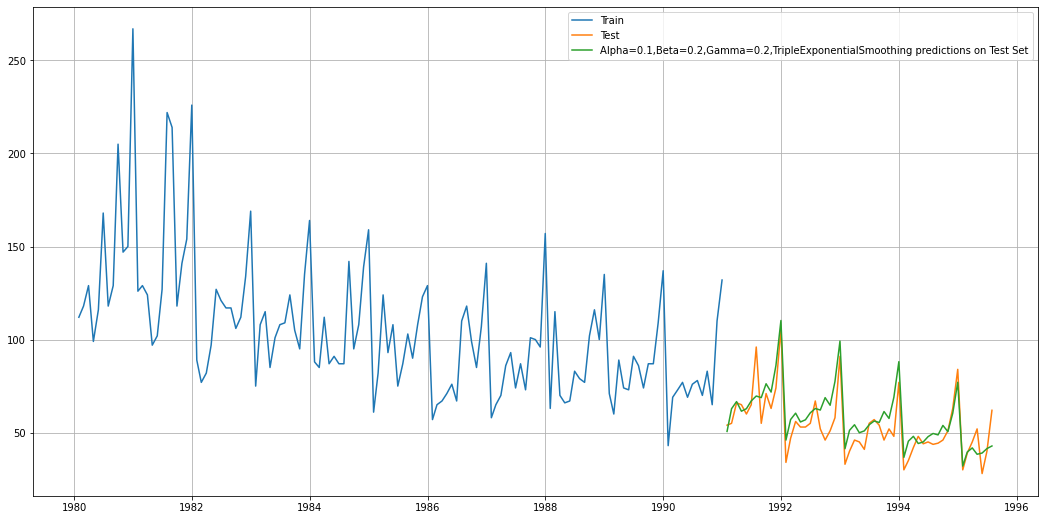

In [82]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')
plt.plot(TES_test['predict', 0.1, 0.2, 0.2], label='Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [83]:
resultsDf_8_3 = pd.DataFrame({'RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['TripleExponentialSmoothing @Alpha=0.1,Beta=0.2,Gamma=0.2'])
resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

,RMSE
LinearRegression,15.291460
NaiveModel,79.778066
SimpleAverageModel,53.521557
2pointTrailingMovingAverage,11.530180
5pointTrailingMovingAverage,14.491131
8pointTrailingMovingAverage,14.811615
SimpleExponentialSmoothing @Alpha=0.995,36.858571
SimpleExponentialSmoothing @Alpha=0.1,36.890375
"DoubleExponentialSmoothing @Alpha=0.1,Beta=0.1",36.987695
"TripleExponentialSmoothing @Alpha=0.062,Beta=0.055,Gamma=3.115",21.458971


In [84]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['RMSE'])

Sorted by RMSE values on the Test Data: 



,RMSE
"TripleExponentialSmoothing @Alpha=0.1,Beta=0.2,Gamma=0.2",9.665739
2pointTrailingMovingAverage,11.530180
5pointTrailingMovingAverage,14.491131
8pointTrailingMovingAverage,14.811615
LinearRegression,15.291460
"TripleExponentialSmoothing @Alpha=0.062,Beta=0.055,Gamma=3.115",21.458971
SimpleExponentialSmoothing @Alpha=0.995,36.858571
SimpleExponentialSmoothing @Alpha=0.1,36.890375
"DoubleExponentialSmoothing @Alpha=0.1,Beta=0.1",36.987695
SimpleAverageModel,53.521557


In [85]:
resultsDf1=resultsDf.copy()

### Plot to compare the Exponential Models

### Build the Best Model

In [87]:
fullmodel1 = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.1,
                                                                 smoothing_trend=0.2,
                                                                 smoothing_seasonal=0.2)

In [88]:
RMSE_fullmodel1 = metrics.mean_squared_error(df['Rose'],fullmodel1.fittedvalues,squared=False)
print('RMSE:',RMSE_fullmodel1)

RMSE: 17.411770315489036


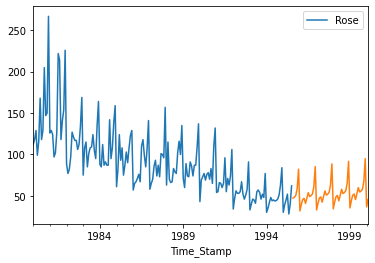

In [89]:
prediction_1 = fullmodel1.forecast(steps=len(test))
df.plot()
prediction_1.plot();

In [90]:
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

,lower_CI,prediction,upper_ci
1995-08-31,13.049823,47.250342,81.450862
1995-09-30,14.070165,48.270685,82.471204
1995-10-31,16.095596,50.296116,84.496635
1995-11-30,24.311272,58.511791,92.712310
1995-12-31,48.008626,82.209146,116.409665


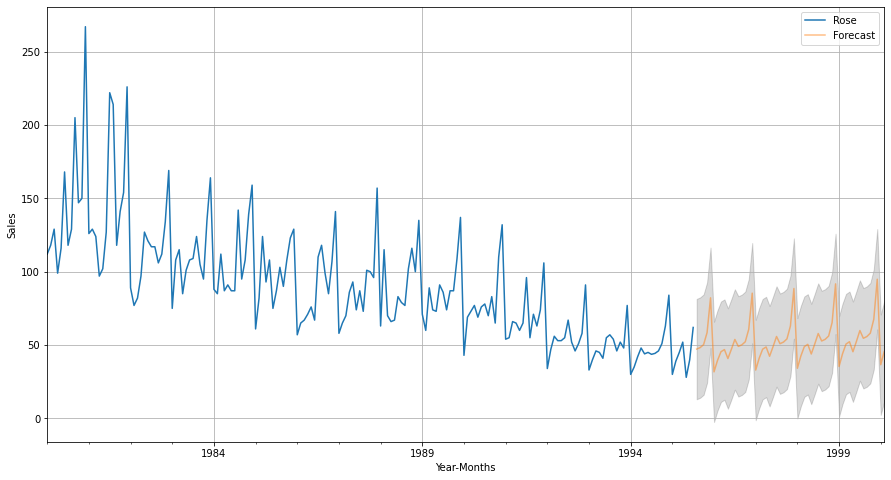

In [91]:
axis = df.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

### 5.Checking Stationarity

In [92]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

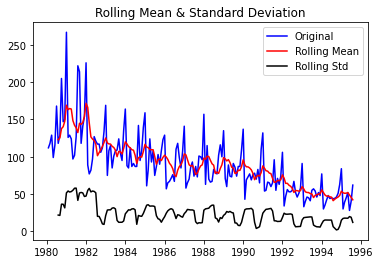

Results of Dickey-Fuller Test:
Test Statistic                  -1.873273
p-value                          0.344737
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [93]:
test_stationarity(df)

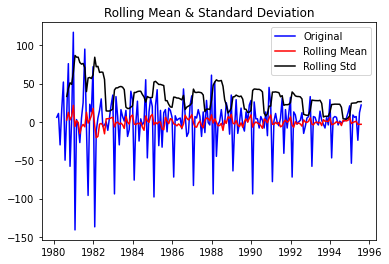

Results of Dickey-Fuller Test:
Test Statistic                -8.043385e+00
p-value                        1.821604e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [94]:
test_stationarity(df.diff().dropna())

### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

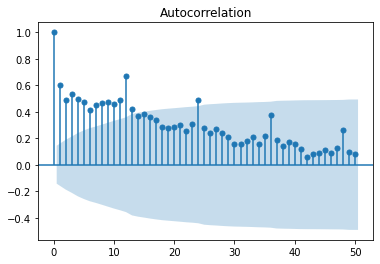

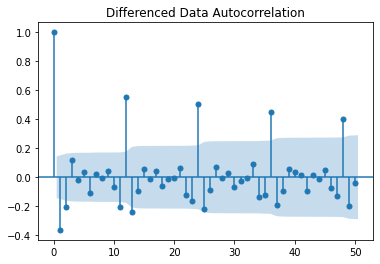

In [95]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df,lags=50)
plot_acf(df.diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

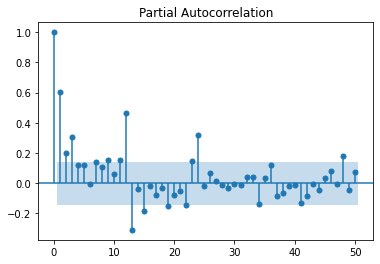

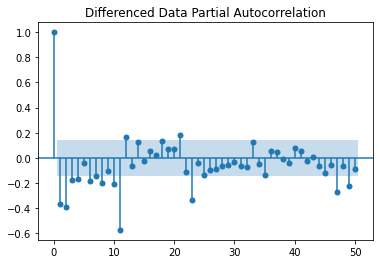

In [96]:
plot_pacf(df,lags=50)
plot_pacf(df.diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

#### Checking Stationarity of Train set

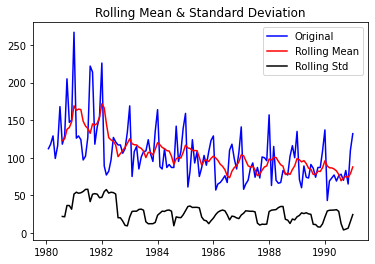

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [97]:
test_stationarity(train)

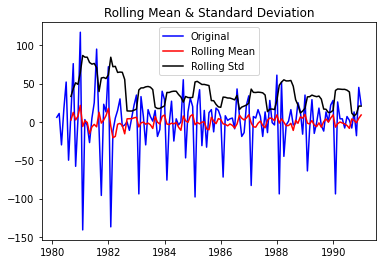

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [98]:
test_stationarity(train.diff().dropna())

### 6.Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [99]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [100]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])

from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train.values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)    

ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.7261830464035
ARIMA(0, 1, 2) - AIC:1276.8353724115532
ARIMA(1, 1, 0) - AIC:1319.3483105803125
ARIMA(1, 1, 1) - AIC:1277.7757493733707
ARIMA(1, 1, 2) - AIC:1277.3592229395217
ARIMA(2, 1, 0) - AIC:1300.609261174427
ARIMA(2, 1, 1) - AIC:1279.0456894093113
ARIMA(2, 1, 2) - AIC:1279.298693936556


In [101]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
2,"(0, 1, 2)",1276.835372
5,"(1, 1, 2)",1277.359223
4,"(1, 1, 1)",1277.775749
7,"(2, 1, 1)",1279.045689
8,"(2, 1, 2)",1279.298694
1,"(0, 1, 1)",1280.726183
6,"(2, 1, 0)",1300.609261
3,"(1, 1, 0)",1319.348311
0,"(0, 1, 0)",1335.152658


In [102]:
auto_ARIMA = ARIMA(train, order=(0,1,2),freq='M')
results_auto_ARIMA = auto_ARIMA.fit()
print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -634.418
Method:                       css-mle   S.D. of innovations             30.167
Date:                Sat, 24 Apr 2021   AIC                           1276.835
Time:                        17:08:09   BIC                           1288.336
Sample:                    02-29-1980   HQIC                          1281.509
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4885      0.085     -5.742      0.000      -0.655      -0.322
ma.L1.D.Rose    -0.7601      0.101     -7.499      0.000      -0.959      -0.561
ma.L2.D.Rose    -0.2398      0.095     -2.51

#### Predict on the Test Set using this model and evaluate the model.

In [103]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test,predicted_auto_ARIMA[0],squared=False)
print(rmse)

15.640545523436213


In [104]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA_AIC(0,1,2)'])
resultsDf

,RMSE
"ARIMA_AIC(0,1,2)",15.640546


### Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

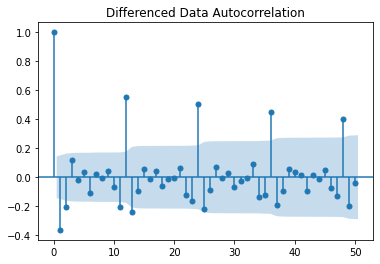

In [105]:
plot_acf(df.diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

#### 6 month seasonality

In [106]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [107]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])

import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train.values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1264.499626111386
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1144.707747182729
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1274.7897737087985
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1241.7870945149084
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1146.3093266722183
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1137.9167236212038
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1137.4533629515174
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1117.022442594
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1201.3832548029545
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1097.1908217752787
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:1222.4354735745046
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:1160.4386253746259
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1084.856412390272
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1095.7490379982166
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1097.6455187497504
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1053.0044082624609
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC:

In [108]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
53,"(1, 1, 2)","(2, 0, 2, 6)",1041.655818
26,"(0, 1, 2)","(2, 0, 2, 6)",1043.600261
80,"(2, 1, 2)","(2, 0, 2, 6)",1045.220571
71,"(2, 1, 1)","(2, 0, 2, 6)",1051.673461
44,"(1, 1, 1)","(2, 0, 2, 6)",1052.778470


In [109]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train.values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -512.828
Date:                           Sat, 24 Apr 2021   AIC                           1041.656
Time:                                   17:08:35   BIC                           1063.685
Sample:                                        0   HQIC                          1050.598
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5939      0.152     -3.899      0.000      -0.892      -0.295
ma.L1         -0.1954    799.740     -0.000

#### Predict on the Test Set using this model and evaluate the model.

In [110]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,62.841435,18.848416,25.899217,99.783652
1,67.630543,19.300215,29.802817,105.458270
2,74.747073,19.412764,36.698756,112.795391
3,71.325789,19.475703,33.154112,109.497465
4,76.018296,19.483981,37.830395,114.206197


In [111]:
rmse = mean_squared_error(test,predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

26.209519406905905


In [112]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA_AIC(1,1,2)(2,0,2,6)'])
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

,RMSE
"ARIMA_AIC(0,1,2)",15.640546
"SARIMA_AIC(1,1,2)(2,0,2,6)",26.209519


#### 12 month seasonality

In [113]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [114]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])

import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train.values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207466
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380887
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386118
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635752832
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697525
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945694
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918337
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.631404938394
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.7936324918412
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.743433094713
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483306725
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866535865
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461677
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988268585618
SARIMA(0, 1, 2)x(0, 0, 

In [115]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 12)",887.937509
53,"(1, 1, 2)","(2, 0, 2, 12)",889.903097
80,"(2, 1, 2)","(2, 0, 2, 12)",890.668798
69,"(2, 1, 1)","(2, 0, 0, 12)",896.518161
78,"(2, 1, 2)","(2, 0, 0, 12)",897.346444


In [116]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train.values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Sat, 24 Apr 2021   AIC                            887.938
Time:                                    17:09:11   BIC                            906.448
Sample:                                         0   HQIC                           895.437
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    189.952     -0.004      0.996    -373.141     371.455
ma.L2         -0.1573     29.842   

#### Predict on the Test Set using this model and evaluate the model.

In [117]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,62.867264,15.928501,31.647976,94.086553
1,70.541190,16.147659,38.892360,102.190020
2,77.356411,16.147657,45.707585,109.005236
3,76.208814,16.147657,44.559988,107.857639
4,72.747398,16.147657,41.098573,104.396223


In [118]:
rmse = mean_squared_error(test,predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

26.992037913416443


In [119]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA_AIC(0,1,2)(2,0,2,12)'])
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

,RMSE
"ARIMA_AIC(0,1,2)",15.640546
"SARIMA_AIC(1,1,2)(2,0,2,6)",26.209519
"SARIMA_AIC(0,1,2)(2,0,2,12)",26.992038


### 7.Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

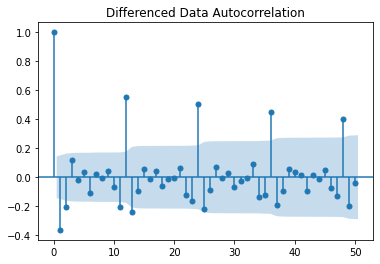

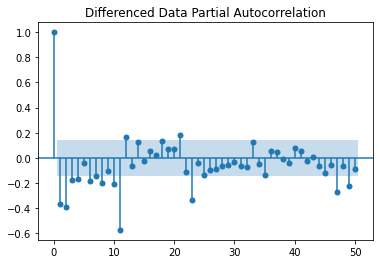

In [120]:
plot_acf(df.diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df.diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [121]:
manual_ARIMA = ARIMA(train.astype('float64'), order=(1,1,1),freq='M')
results_manual_ARIMA = manual_ARIMA.fit()
print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -634.888
Method:                       css-mle   S.D. of innovations             30.279
Date:                Sat, 24 Apr 2021   AIC                           1277.776
Time:                        17:09:12   BIC                           1289.277
Sample:                    02-29-1980   HQIC                          1282.449
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4871      0.086     -5.656      0.000      -0.656      -0.318
ar.L1.D.Rose     0.2006      0.087      2.293      0.022       0.029       0.372
ma.L1.D.Rose    -0.9999      0.035    -28.64

#### Predict on the Test Set using this model and evaluate the model.

In [122]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))
rmse = mean_squared_error(test,predicted_manual_ARIMA[0],squared=False)
print(rmse)

15.756588807367548


In [123]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA_ACF/PACF(1,1,1)'])
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

,RMSE
"ARIMA_AIC(0,1,2)",15.640546
"SARIMA_AIC(1,1,2)(2,0,2,6)",26.209519
"SARIMA_AIC(0,1,2)(2,0,2,12)",26.992038
"ARIMA_ACF/PACF(1,1,1)",15.756589


### Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. 

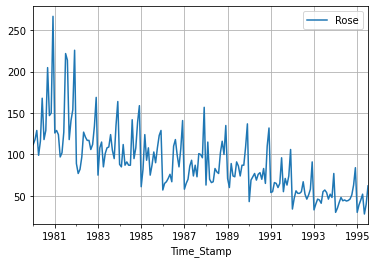

In [124]:
df.plot()
plt.grid();

#### 6 month seasonality

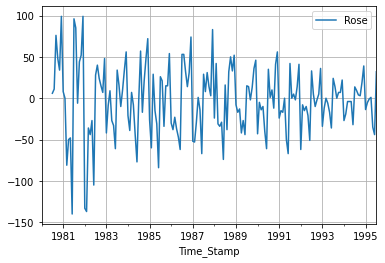

In [125]:
(df.diff(6)).plot()
plt.grid();

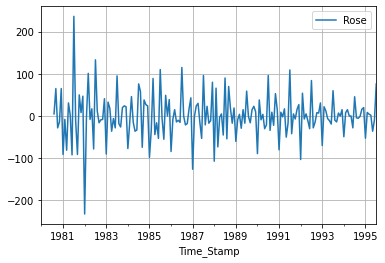

In [126]:
(df.diff(6)).diff().plot()
plt.grid();

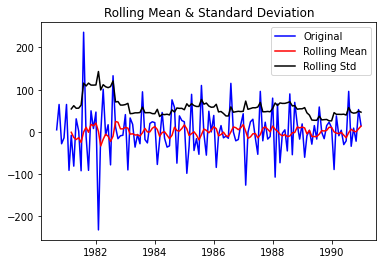

Results of Dickey-Fuller Test:
Test Statistic                -6.882869e+00
p-value                        1.418693e-09
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64 



In [127]:
test_stationarity((train.diff(6).dropna()).diff(1).dropna())

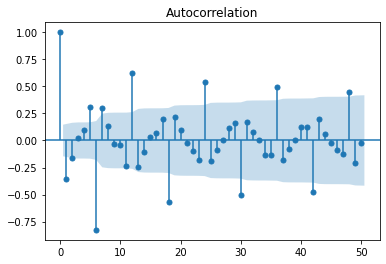

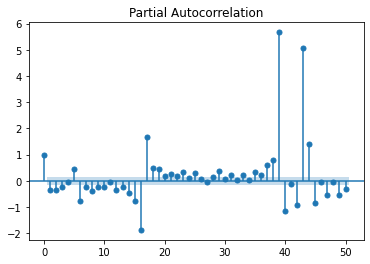

In [128]:
plot_acf((df.diff(6).dropna()).diff(1).dropna(),lags=50)
plot_pacf((df.diff(6).dropna()).diff(1).dropna(),lags=50);

In [129]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train.values,
                                order=(2, 1, 2),
                                seasonal_order=(1, 1, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                         SARIMAX Results                                         
Dep. Variable:                                         y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(1, 1, [1, 2, 3], 6)   Log Likelihood                -454.294
Date:                                   Sat, 24 Apr 2021   AIC                            926.588
Time:                                           17:09:16   BIC                            950.387
Sample:                                                0   HQIC                           936.229
                                                   - 132                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6050      0.210     -2.877      0.004    

#### Predict on the Test Set using this model and evaluate the model.

In [130]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,52.681904,18.893025,15.652255,89.711553
1,65.638232,19.468441,27.480789,103.795676
2,72.769530,19.499975,34.550281,110.988779
3,70.096433,19.672851,31.538353,108.654513
4,74.654779,19.732031,35.980709,113.328849


In [131]:
rmse = mean_squared_error(test,predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

20.350502313978417


In [132]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA_ACF/PACF(2,1,2)(1,1,3,6)'])
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

,RMSE
"ARIMA_AIC(0,1,2)",15.640546
"SARIMA_AIC(1,1,2)(2,0,2,6)",26.209519
"SARIMA_AIC(0,1,2)(2,0,2,12)",26.992038
"ARIMA_ACF/PACF(1,1,1)",15.756589
"SARIMA_ACF/PACF(2,1,2)(1,1,3,6)",20.350502


#### 12 month seasonality

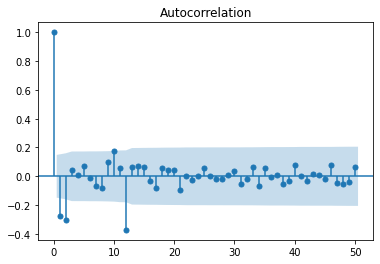

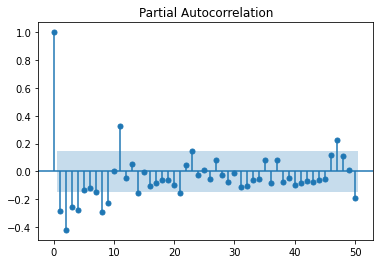

In [133]:
plot_acf((df.diff(12).dropna()).diff(1).dropna(),lags=50)
plot_pacf((df.diff(12).dropna()).diff(1).dropna(),lags=50);

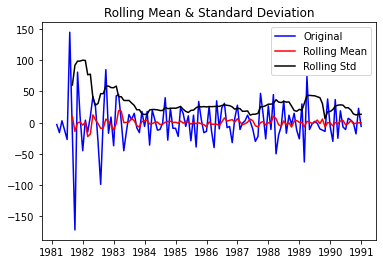

Results of Dickey-Fuller Test:
Test Statistic                  -3.692348
p-value                          0.004222
#Lags Used                      11.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64 



In [134]:
test_stationarity((train.diff(12).dropna()).diff(1).dropna())

In [135]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train.values,
                                order=(3, 1, 2),
                                seasonal_order=(1, 1, 3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                         SARIMAX Results                                          
Dep. Variable:                                          y   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(1, 1, [1, 2, 3], 12)   Log Likelihood               -1693.730
Date:                                    Sat, 24 Apr 2021   AIC                           3407.459
Time:                                            17:09:23   BIC                           3431.280
Sample:                                                 0   HQIC                          3417.009
                                                    - 132                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4102         -0        inf      0

#### Predict on the Test Set using this model and evaluate the model.

In [136]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,40.998880,6.246373e+08,-1.224267e+09,1.224267e+09
1,34.142372,6.800742e+08,-1.332921e+09,1.332921e+09
2,74.503649,6.804799e+08,-1.333716e+09,1.333716e+09
3,67.332349,6.878389e+08,-1.348139e+09,1.348140e+09
4,59.984549,7.055792e+08,-1.382910e+09,1.382910e+09


In [137]:
rmse = mean_squared_error(test,predicted_manual_SARIMA_12.predicted_mean,squared=False)
print(rmse)

20.470001022290948


In [138]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA_ACF/PACF(3,1,2)(1,1,3,12)'])
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

,RMSE
"ARIMA_AIC(0,1,2)",15.640546
"SARIMA_AIC(1,1,2)(2,0,2,6)",26.209519
"SARIMA_AIC(0,1,2)(2,0,2,12)",26.992038
"ARIMA_ACF/PACF(1,1,1)",15.756589
"SARIMA_ACF/PACF(2,1,2)(1,1,3,6)",20.350502
"SARIMA_ACF/PACF(3,1,2)(1,1,3,12)",20.470001


In [139]:
resultsDf2=resultsDf.copy()

## 8. ResultSet based on RMSE values

In [140]:
a=[resultsDf1,resultsDf2]
resultset= pd.concat(a)
resultset

,RMSE
LinearRegression,15.291460
NaiveModel,79.778066
SimpleAverageModel,53.521557
2pointTrailingMovingAverage,11.530180
5pointTrailingMovingAverage,14.491131
8pointTrailingMovingAverage,14.811615
SimpleExponentialSmoothing @Alpha=0.995,36.858571
SimpleExponentialSmoothing @Alpha=0.1,36.890375
"DoubleExponentialSmoothing @Alpha=0.1,Beta=0.1",36.987695
"TripleExponentialSmoothing @Alpha=0.062,Beta=0.055,Gamma=3.115",21.458971


In [141]:
resultset.sort_values(by='RMSE')

,RMSE
"TripleExponentialSmoothing @Alpha=0.1,Beta=0.2,Gamma=0.2",9.665739
2pointTrailingMovingAverage,11.530180
5pointTrailingMovingAverage,14.491131
8pointTrailingMovingAverage,14.811615
LinearRegression,15.291460
"ARIMA_AIC(0,1,2)",15.640546
"ARIMA_ACF/PACF(1,1,1)",15.756589
"SARIMA_ACF/PACF(2,1,2)(1,1,3,6)",20.350502
"SARIMA_ACF/PACF(3,1,2)(1,1,3,12)",20.470001
"TripleExponentialSmoothing @Alpha=0.062,Beta=0.055,Gamma=3.115",21.458971


### 9.Build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [142]:
full_data_model = sm.tsa.statespace.SARIMAX(df,
                                order=(2,1,2),
                                seasonal_order=(1, 1, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                         SARIMAX Results                                         
Dep. Variable:                                      Rose   No. Observations:                  187
Model:             SARIMAX(2, 1, 2)x(1, 1, [1, 2, 3], 6)   Log Likelihood                -669.097
Date:                                   Sat, 24 Apr 2021   AIC                           1356.195
Time:                                           17:09:27   BIC                           1383.815
Sample:                                       01-31-1980   HQIC                          1367.411
                                            - 07-31-1995                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8956      0.103     -8.675      0.000    

In [143]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,46.262616,15.671262,15.547507,76.977725
1995-09-30,44.592673,15.994434,13.244158,75.941187
1995-10-31,51.479750,16.033458,20.054751,82.904750
1995-11-30,48.639325,16.219823,16.849057,80.429593
1995-12-31,73.950231,16.261941,42.077413,105.823049


In [144]:
rmse = mean_squared_error(df,results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 33.95879795709222


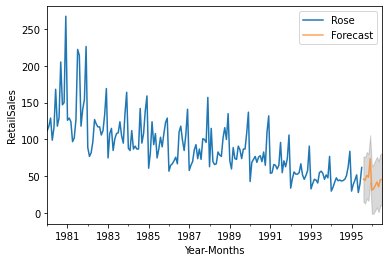

In [145]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))

axis = df.plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('RetailSales')
plt.legend(loc='best')
plt.show()